In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import calendar
from sklearn.linear_model import LinearRegression
import scipy.signal as signal
from scipy.stats import norm
import seaborn as sns

In [3]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("peso.pdf")

In [4]:
df = pd.read_csv("./data/SWT_EXPORT_12_09_20_23_14.csv",
                 parse_dates=["Date"],
                 dtype={"Date":"str", "Weight":"float"})
df=df.drop_duplicates()
df.head()

,Date,Weight
0,2017-11-13,76.1
1,2017-11-14,76.2
2,2017-11-15,76.6
3,2017-11-16,77.1
4,2017-11-17,76.7


In [5]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df["Day"] = pd.DatetimeIndex(df["Date"]).day
df["Week"] = pd.DatetimeIndex(df["Date"]).week
df["DayOfWeek"] = pd.DatetimeIndex(df["Date"]).dayofweek
df.head()

,Date,Weight,Year,Month,Day,Week,DayOfWeek
0,2017-11-13,76.1,2017,11,13,46,0
1,2017-11-14,76.2,2017,11,14,46,1
2,2017-11-15,76.6,2017,11,15,46,2
3,2017-11-16,77.1,2017,11,16,46,3
4,2017-11-17,76.7,2017,11,17,46,4


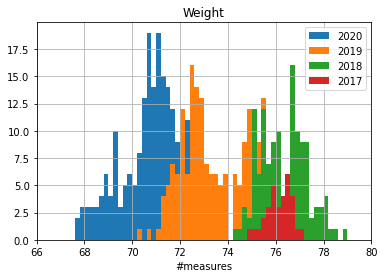

In [6]:
pmin, pmax, nbins = (66,80,70)
bins=np.linspace(pmin,pmax,nbins+1)
fig, ax = plt.subplots()
df[df["Year"] == 2020].hist(column="Weight", bins=bins, ax=ax, label = "2020")
df[df["Year"] == 2019].hist(column="Weight", bins=bins, ax=ax, label = "2019")
df[df["Year"] == 2018].hist(column="Weight", bins=bins, ax=ax, label = "2018")
df[df["Year"] == 2017].hist(column="Weight", bins=bins, ax=ax, label = "2017")
plt.xlim(pmin,pmax)
plt.xlabel("Weight (kg)")
plt.xlabel("#measures")
plt.legend()
plt.show()
pdf.savefig(fig)

In [49]:
pmin, pmax, nbins = (66,80,70)
xbins=np.linspace(pmin,pmax,nbins+1)
ybins=["2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01"]
#ybins=pd.to_datetime(ybins)
ybins=[datetime.datetime.strptime(item, '%Y-%m-%d') for item in ybins]
g = sns.JointGrid(data=df,
    x="Date",
    y="Weight",
    hue="Year",
    xlim=(ybins[0],ybins[-1]),
    ylim=(pmin,pmax),
    marginal_ticks=True,
    height=6, 
    ratio=2, 
    space=.05)
g.plot_joint(sns.scatterplot, 
        alpha=.4,
        legend=True)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
# top marginal
sns.histplot(data=df, x="Date", hue="Year", bins=ybins, ax=g.ax_marg_x, legend=False, multiple='stack')
# right marginal
sns.histplot(data=df, y="Weight", hue="Year", bins=xbins, ax=g.ax_marg_y, legend=False, multiple='stack')
#g.plot_marginals(sns.histplot, 
#    multiple="stack", 
#    hue=df["Year"])
plt.show()
#pdf.savefig(fig)

TypeError: '<' not supported between instances of 'float' and 'datetime.datetime'

In [8]:
g.ax_marg_x

<AxesSubplot:xlabel='Date', ylabel='Count'>

In [9]:
df_year = df[["Year","Weight"]].groupby(["Year"]).count()
df_year.columns = ["count"]
df_year["mean"] = df[["Year","Weight"]].groupby(["Year"]).mean()
df_year["var"] = df[["Year","Weight"]].groupby(["Year"]).var()
df_year["std"] = df[["Year","Weight"]].groupby(["Year"]).std()
df_year = df_year.reset_index()
df_year["Date"] = pd.to_datetime(df_year["Year"].map('{:04}-07-01'.format), format='%Y-%m-%d')
df_year

,Year,count,mean,var,std,Date
0,2017,32,76.090625,0.284103,0.533013,2017-07-01
1,2018,132,76.287121,0.915024,0.956569,2018-07-01
2,2019,208,73.738462,2.419673,1.555530,2019-07-01
3,2020,212,70.708491,1.486373,1.219169,2020-07-01


In [10]:
df_month = df[["Year","Month","Weight"]].groupby(["Year","Month"]).count()
df_month.columns = ["count"]
df_month["mean"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).mean()
df_month["var"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).var()
df_month["std"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).std()
df_month = df_month.reset_index()
df_month["YearMonth"] = df_month["Year"].map('{:04}'.format) + "-" +df_month["Month"].map('{:02}'.format)
df_month["Date"] = pd.to_datetime(df_month["Year"].map('{:04}'.format) + "-" 
                                 + df_month["Month"].map('{:02}'.format) + "-15", format='%Y-%m-%d')
df_month.head()

,Year,Month,count,mean,var,std,YearMonth,Date
0,2017,11,16,76.468750,0.082292,0.286865,2017-11,2017-11-15
1,2017,12,16,75.712500,0.199833,0.447027,2017-12,2017-12-15
2,2018,1,14,76.564286,0.228626,0.478149,2018-01,2018-01-15
3,2018,2,18,76.716667,0.273235,0.522719,2018-02,2018-02-15
4,2018,3,14,76.871429,0.248352,0.498349,2018-03,2018-03-15


In [11]:
df_week = df[["Year","Week","Weight"]].groupby(["Year","Week"]).count()
df_week.columns = ["count"]
df_week["mean"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).mean()
df_week["var"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).var()
df_week["std"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).std()
df_week = df_week.reset_index()
df_week["YearWeek"] = df_week["Year"].map('{:04}'.format) + "-" +df_week["Week"].map('{:02}'.format)
df_week["Date"] = df_week["Year"].map('{:04}'.format) + "-W" + df_week["Week"].map('{:02}'.format) + "-04"
df_week["Date"] = df_week["Date"].apply(lambda x: datetime.datetime.strptime(x, '%Y-W%W-0%w'))
df_week["Date"] = pd.to_datetime(df_week["Date"], format='%Y-%m-%d')
df_week.head()

,Year,Week,count,mean,var,std,YearWeek,Date
0,2017,46,7,76.471429,0.175714,0.419183,2017-46,2017-11-16
1,2017,47,6,76.516667,0.021667,0.147196,2017-47,2017-11-23
2,2017,48,6,76.083333,0.113667,0.337145,2017-48,2017-11-30
3,2017,49,4,75.425000,0.215833,0.464579,2017-49,2017-12-07
4,2017,50,5,75.740000,0.373000,0.610737,2017-50,2017-12-14


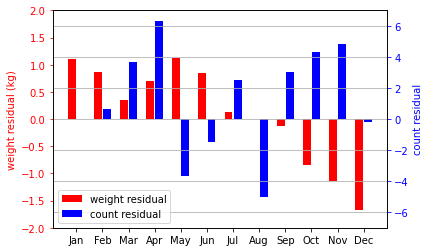

In [12]:
df_yearmonth_weight = pd.merge(df_month[["Year","Month","mean"]].rename(columns={"mean":"mean_month"}),
                        df_year[["Year","mean"]].rename(columns={"mean":"mean_year"}),
                        how='left',on="Year",validate="m:1")
df_yearmonth_weight["residual"] = df_yearmonth_weight["mean_month"] - df_yearmonth_weight["mean_year"]
df_yearmonth_weight=df_yearmonth_weight[["Month","residual"]].groupby(["Month"]).mean()
df_yearmonth_weight=df_yearmonth_weight.reset_index()
df_yearmonth_count = pd.merge(df_month[["Year","Month","count"]].rename(columns={"count":"count_month"}),
                        df_year[["Year","count"]].rename(columns={"count":"count_year"}),
                        how='left',on="Year",validate="m:1")
df_yearmonth_count["residual"] = df_yearmonth_count["count_month"] - df_yearmonth_count["count_year"]/12.
df_yearmonth_count=df_yearmonth_count[["Month","residual"]].groupby(["Month"]).mean()
df_yearmonth_count=df_yearmonth_count.reset_index()
width=0.35
fig, ax = plt.subplots()
ax2 = ax.twinx()
plot1 = ax.bar(df_yearmonth_weight["Month"]-0.5*width,
    df_yearmonth_weight["residual"],
    width-0.05,
    color="r")
plot2 = ax2.bar(df_yearmonth_count["Month"]+0.5*width,
    df_yearmonth_count["residual"],
    width-0.05,
    color="b")
ax.set_ylim(-2,2)
ax2.set_ylim(-7, 7)
ax.set_ylabel('weight residual (kg)')
ax2.set_ylabel('count residual')
ax.tick_params(axis='y', colors='red')
ax.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')
plt.xlabel("")
plt.xticks(range(1,13),[calendar.month_name[x][0:3] for x in range(1,13)],rotation=0)
plt.legend((plot1,plot2),("weight residual","count residual"))
plt.grid(True)
plt.show()
pdf.savefig(fig)

In [13]:
df_yearmonth = pd.merge(df_yearmonth_weight[["Month","residual"]].rename(columns={"residual":"res_weight"}).groupby(["Month"]).mean(),
                        df_yearmonth_count[["Month","residual"]].rename(columns={"residual":"res_count"}).groupby(["Month"]).mean(),
                        on="Month",validate="1:1")

In [14]:
model_ym = LinearRegression()
x = df_yearmonth.iloc[:, 0].values.reshape(-1, 1)
y = df_yearmonth.iloc[:, 1].values.reshape(-1, 1)
l = df_yearmonth.index
model_ym.fit(x,y)
fy = model_ym.predict(x)

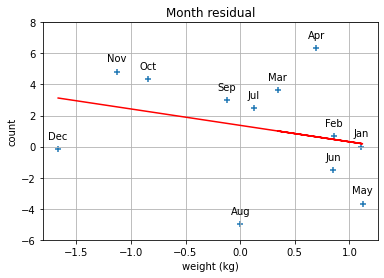

In [15]:
fig, ax = plt.subplots()
plt.scatter(x,y,marker="+")
plt.plot(x, fy, color='red')
plt.title("Month residual")
plt.ylabel("count")
plt.xlabel("weight (kg)")
plt.ylim(-6,8)
for xv,yv,lv in zip(x,y,l):
    plt.annotate(calendar.month_name[lv][0:3], # this is the text
                 (xv,yv), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(True)
plt.show()
pdf.savefig(fig)

In [16]:
df_yearmonth.corr(method='pearson')

,res_weight,res_count
res_weight,1.000000,-0.277451
res_count,-0.277451,1.000000


In [17]:
df["count"] = [1 for i in range(len(df["Weight"]))]
dates = pd.date_range(min(df['Date']),max(df['Date']),freq='d')
df_day = pd.DataFrame()
df_day["Date"] = dates
df_day = pd.merge(df_day, df[["Date","count"]], how='left',on="Date",validate="1:m")
df_day["count"] = df_day["count"].fillna(0)
df_day["Year"] = pd.DatetimeIndex(df_day["Date"]).year
df_day["Month"] = pd.DatetimeIndex(df_day["Date"]).month
df_day["Day"] = pd.DatetimeIndex(df_day["Date"]).day
df_day["Week"] = pd.DatetimeIndex(df_day["Date"]).week
df_day["DayOfWeek"] = pd.DatetimeIndex(df_day["Date"]).dayofweek
df_day["YearWeek"] = df_day["Year"].map('{:04}'.format) + "-" + df_day["Week"].map('{:02}'.format)
df_day.head()

,Date,count,Year,Month,Day,Week,DayOfWeek,YearWeek
0,2017-11-13,1.0,2017,11,13,46,0,2017-46
1,2017-11-14,1.0,2017,11,14,46,1,2017-46
2,2017-11-15,1.0,2017,11,15,46,2,2017-46
3,2017-11-16,1.0,2017,11,16,46,3,2017-46
4,2017-11-17,1.0,2017,11,17,46,4,2017-46


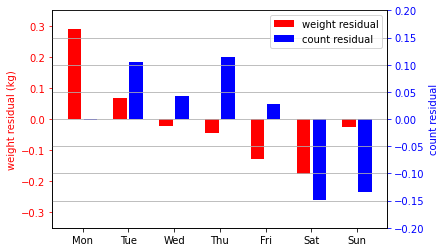

In [18]:
df_weekday_count = pd.merge(df_day[["YearWeek","DayOfWeek","count"]].rename(columns={"count":"count_day"}),
                        df_week[["YearWeek","count"]].rename(columns={"count":"count_week"}),
                        how='left',on="YearWeek",validate="m:1")
df_weekday_count["residual"] = df_weekday_count["count_day"] - df_weekday_count["count_week"]/7.
df_weekday_count=df_weekday_count[["DayOfWeek", "residual"]].groupby(["DayOfWeek"]).mean()
df_weekday_count=df_weekday_count.reset_index()
df["YearWeek"] = df["Year"].map('{:04}'.format) + "-" + df["Week"].map('{:02}'.format)
df_weekday_weight = pd.merge(df[["YearWeek","DayOfWeek","Weight"]],
                        df_week[["YearWeek","mean"]],
                        how='left',on="YearWeek",validate="m:1")
df_weekday_weight["residual"] = df_weekday_weight["Weight"] - df_weekday_weight["mean"]
df_weekday_weight=df_weekday_weight[["DayOfWeek", "residual"]].groupby(["DayOfWeek"]).mean()
df_weekday_weight=df_weekday_weight.reset_index()
width=0.35
fig, ax = plt.subplots()
ax2 = ax.twinx()
plot1 = ax.bar(df_weekday_weight["DayOfWeek"]-0.5*width,
    df_weekday_weight["residual"],
    width-0.05,
    color="r")
plot2 = ax2.bar(df_weekday_count["DayOfWeek"]+0.5*width,
    df_weekday_count["residual"],
    width-0.05,
    color="b")
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-0.2, 0.2)
ax.set_ylabel('weight residual (kg)')
ax2.set_ylabel('count residual')
ax.tick_params(axis='y', colors='red')
ax.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')
plt.xlabel("")
plt.xticks(range(0,7),[calendar.day_name[x][0:3] for x in range(0,7)],rotation=0)
plt.legend((plot1,plot2),("weight residual","count residual"))
plt.grid(True)
plt.show()
pdf.savefig(fig)

In [19]:
df_weekday = pd.merge(df_weekday_weight[["DayOfWeek","residual"]].rename(columns={"residual":"res_weight"}).groupby(["DayOfWeek"]).mean(),
                        df_weekday_count[["DayOfWeek","residual"]].rename(columns={"residual":"res_count"}).groupby(["DayOfWeek"]).mean(),
                        on="DayOfWeek",validate="1:1")

In [20]:
model_wd = LinearRegression()
x = df_weekday.iloc[:, 0].values.reshape(-1, 1)
y = df_weekday.iloc[:, 1].values.reshape(-1, 1)
l = df_weekday.index
model_wd.fit(x,y)
fy = model_wd.predict(x)

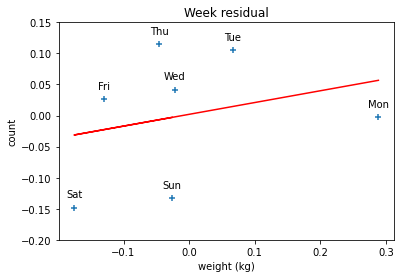

,res_weight,res_count
DayOfWeek,,
0,0.288675,-0.002086
1,0.066786,0.105590
2,-0.021816,0.041710
3,-0.045825,0.114703
4,-0.129732,0.027112
5,-0.175423,-0.148071
6,-0.025974,-0.133472


In [21]:
fig, ax = plt.subplots()
plt.scatter(x,y,marker="+")
plt.plot(x,fy,color='red')
plt.title("Week residual")
plt.ylabel("count")
plt.xlabel("weight (kg)")
plt.ylim(-0.2,0.15)
for xv,yv,lv in zip(x,y,l):
    plt.annotate(calendar.day_name[lv][0:3], # this is the text
                 (xv,yv), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
pdf.savefig(fig)
df_weekday

In [22]:
df_weekday.corr(method='pearson')

,res_weight,res_count
res_weight,1.000000,0.273519
res_count,0.273519,1.000000


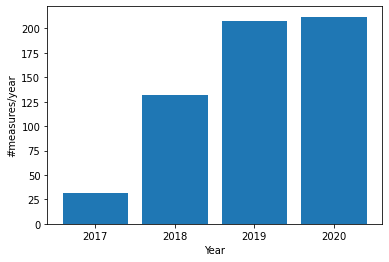

In [23]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.bar(x=df_year["Date"],height=df_year["count"],width=300, align='center')
ax.xaxis.set_ticks(df_year["Date"])
plt.xlabel("Year")
plt.ylabel("#measures/year")
plt.show()
pdf.savefig(fig)

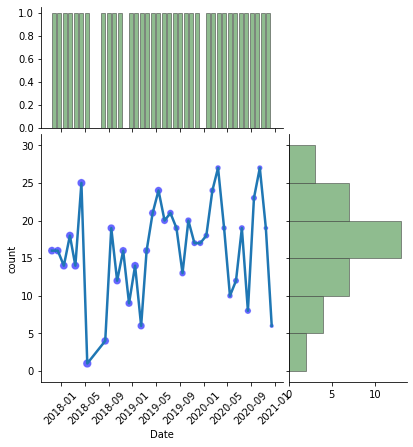

In [24]:
x,y,w=df_month["Date"],df_month["count"],df_month["mean"]
g = sns.JointGrid(x=x, y=y, marginal_ticks=True,height=6, ratio=2, space=.05)
g.plot_joint(sns.scatterplot, 
        size=w,
        color="blue", 
        alpha=.6,
        legend=False)
g.plot_joint(sns.lineplot,
        palette="tab10",
        linewidth=2.5)
plt.xticks(rotation=45)
g.ax_marg_x.hist(x=x,
        bins=40,
        width=20,
        edgecolor=".2",
        linewidth=.5,
        orientation="vertical",
        color="darkseagreen")
g.ax_marg_y.hist(x=y,
        bins=range(0,35,5),
        edgecolor=".2",
        linewidth=.5,
        orientation="horizontal",
        color="darkseagreen")
plt.show()
pdf.savefig(g.fig)

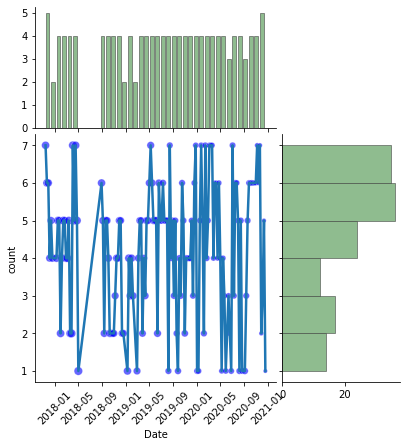

In [25]:
x,y,w=df_week["Date"],df_week["count"],df_week["mean"]
g = sns.JointGrid(x=x, y=y, marginal_ticks=True,height=6, ratio=2, space=.05)
g.plot_joint(sns.scatterplot, 
        size=w,
        color="blue", 
        alpha=.6,
        legend=False)
g.plot_joint(sns.lineplot,
        palette="tab10",
        linewidth=2.5)
plt.xticks(rotation=45)
g.ax_marg_x.hist(x=x,
        bins=40,
        width=20,
        edgecolor=".2",
        linewidth=.5,
        orientation="vertical",
        color="darkseagreen")
g.ax_marg_y.hist(x=y,
        bins=range(1,8),
        edgecolor=".2",
        linewidth=.5,
        orientation="horizontal",
        color="darkseagreen")
plt.show()
pdf.savefig(g.fig)

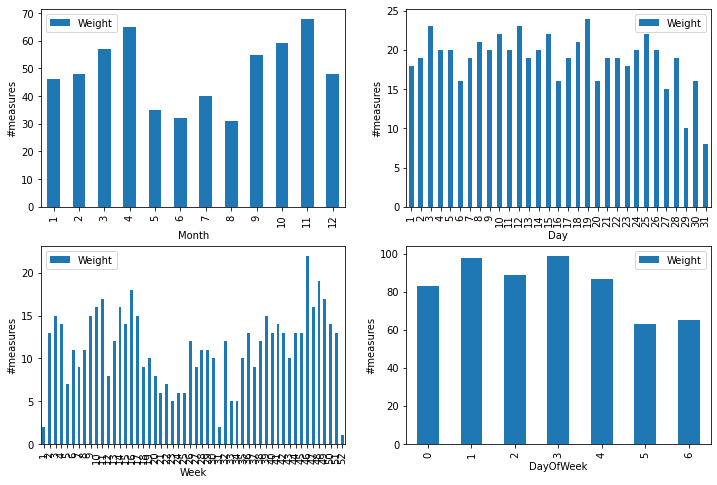

In [26]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=[12, 8])
df[["Month","Weight"]].groupby(["Month"]).count().plot.bar(ax=ax1)
ax1.set_ylabel("#measures")
df[["Day","Weight"]].groupby(["Day"]).count().plot.bar(ax=ax2)
ax2.set_ylabel("#measures")
df[["Week","Weight"]].groupby(["Week"]).count().plot.bar(ax=ax3)
ax3.set_ylabel("#measures")
df[["DayOfWeek","Weight"]].groupby(["DayOfWeek"]).count().plot.bar(ax=ax4)
ax4.set_ylabel("#measures")
plt.show()
pdf.savefig(fig)

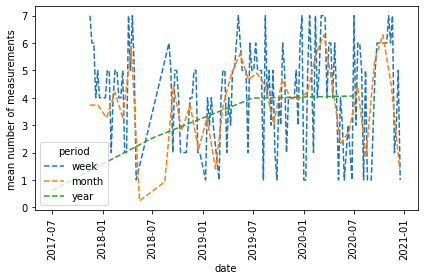

In [27]:
fig, ax = plt.subplots()
plt.plot(df_week["Date"],df_week["count"],"--",label="week")
plt.plot(df_month["Date"],df_month["count"]/30*7,"--",label="month")
plt.plot(df_year["Date"],df_year["count"]/365*7,"--",label="year")
plt.xticks(rotation=90)
plt.legend(title="period")
plt.xlabel("date")
plt.ylabel("mean number of measurements")
plt.tight_layout()
plt.show()
pdf.savefig(fig)

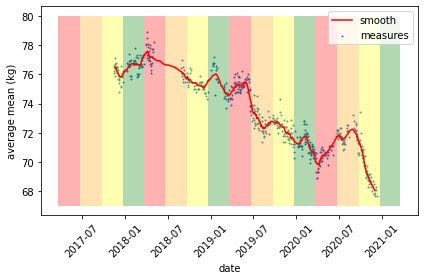

In [28]:
nmeas = 10
weight_dict = {"Weight":[], "Date":[]}
for idx in df.index:
    sub = df[(df.index > idx - nmeas) & (df.index < idx + nmeas)]
    weight_dict["Weight"].append(sub["Weight"].mean())
    weight_dict["Date"].append(min(sub["Date"]) + (sub["Date"] - min(sub["Date"])).mean())
smooth_weight = pd.DataFrame()
smooth_weight["Weight"] = weight_dict["Weight"]
smooth_weight["Date"] = weight_dict["Date"]
fig, ax = plt.subplots()
plt.scatter(x=df["Date"],y=df["Weight"],label="measures",s=1)
plt.plot(smooth_weight["Date"],smooth_weight["Weight"],color="red",label="smooth")
seasons = {}
ymin, ymax = 2017, 2021
for y in range(ymin,ymax):
    seasons[y] = {
        "spring": {
            "date": [datetime.datetime.strptime("{}-03-20".format(y),"%Y-%m-%d"),
                     datetime.datetime.strptime("{}-06-21".format(y),"%Y-%m-%d")],
            "color":"red"},
        "summer": {
            "date": [datetime.datetime.strptime("{}-06-21".format(y),"%Y-%m-%d"),
                     datetime.datetime.strptime("{}-09-22".format(y),"%Y-%m-%d")],
            "color":"orange"},
        "fall"  : {
            "date": [datetime.datetime.strptime("{}-09-22".format(y),"%Y-%m-%d"),
                     datetime.datetime.strptime("{}-12-21".format(y),"%Y-%m-%d")],
            "color":"yellow"},
        "winter": {
            "date": [datetime.datetime.strptime("{}-12-21".format(y),"%Y-%m-%d"),
                     datetime.datetime.strptime("{}-03-20".format(y+1),"%Y-%m-%d")],
            "color":"green"}
    }
for y in seasons:
    for s in seasons[y]:
        plt.fill_between(seasons[y][s]["date"], 67, 80, facecolor=seasons[y][s]["color"], alpha=0.3)
plt.ylabel("average mean (kg)")
plt.xlabel("date")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
pdf.savefig(fig)

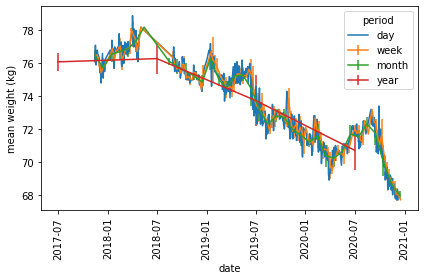

In [29]:
fig, ax = plt.subplots()
plt.errorbar(x=df["Date"],y=df["Weight"],label="day")
plt.errorbar(x=df_week["Date"],y=df_week["mean"],yerr=df_week["std"],label="week")
plt.errorbar(x=df_month["Date"],y=df_month["mean"],yerr=df_month["std"],label="month")
plt.errorbar(x=df_year["Date"],y=df_year["mean"],yerr=df_year["std"],label="year")
plt.xticks(rotation=90)
plt.legend(title="period")
plt.xlabel("date")
plt.ylabel("mean weight (kg)")
plt.tight_layout()
plt.show()
pdf.savefig(fig)

In [30]:
x = df["Date"].astype(int)/(1.E9*60*60*24)
y = df.iloc[:,1]
f = 10**np.linspace(np.log10(1/400), np.log10(1/5), 100000)
pgram = signal.lombscargle(x, y, f, normalize=False)

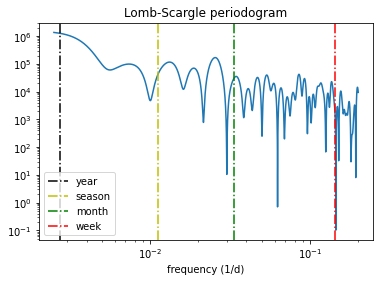

In [31]:
fig, ax = plt.subplots()
plt.plot(f, pgram)
plt.axvline(x=1/365, color='black', label="year",linestyle='-.')
plt.axvline(x=1/90, color='y', label="season",linestyle='-.')
plt.axvline(x=1/30, color='g', label="month",linestyle='-.')
plt.axvline(x=1/7, color='r', label="week",linestyle='-.')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("frequency (1/d)")
plt.title("Lomb-Scargle periodogram")
plt.legend()
plt.show()
pdf.savefig(fig)

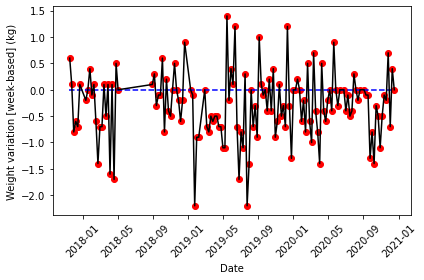

In [32]:
df_max=df[["Year","Week","Date"]].groupby(["Year","Week"]).max()
df_min=df[["Year","Week","Date"]].groupby(["Year","Week"]).min()
df_max=df_max.reset_index()
df_min=df_min.reset_index()
df_minmax=df_max.merge(df[["Date","Weight"]],how="left",on=["Date"],validate="1:1")
df_minmax=df_minmax.merge(df_min,how="left",on=["Year","Week"],validate="1:1")
df_minmax=df_minmax.merge(df[["Date","Weight"]],how="left",left_on=["Date_y"],right_on=["Date"],validate="1:1")
df_minmax.rename(columns={'Date_x': 'Date_max', 'Weight_x': 'Weight_max',
                            'Date_y': 'Date_min', 'Weight_y': 'Weight_min'}, inplace=True)
df_minmax["dw"]=df_minmax["Weight_max"]-df_minmax["Weight_min"]
df_minmax["Date_ref"] = df_minmax["Year"].map('{:04}'.format) + \
                "-W" + df_week["Week"].map('{:02}'.format) + "-04"
df_minmax["Date_ref"] = df_minmax["Date_ref"].apply(lambda x: datetime.datetime.strptime(x, '%Y-W%W-0%w'))
fig, ax = plt.subplots()
plt.plot(df_minmax["Date_ref"],df_minmax["dw"],color="black")
plt.scatter(df_minmax["Date_ref"],df_minmax["dw"],color="r")
plt.xticks(rotation=45)
plt.hlines(0., min(df_minmax["Date_min"]), max(df_minmax["Date_max"]), colors='b', linestyles='--')
plt.xlabel("Date")
plt.ylabel("Weight variation [week-based] (kg)")
plt.tight_layout()
plt.show()
pdf.savefig(fig)

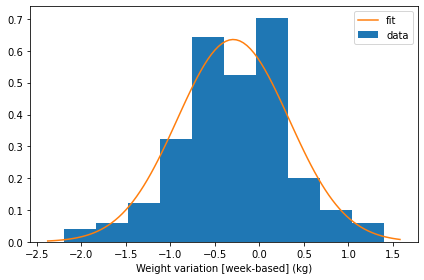

mean: -0.29, std: 0.63


In [33]:
fig, ax = plt.subplots()
plt.hist(df_minmax["dw"],bins=10,density=True,label="data")
mean,std=norm.fit(df_minmax["dw"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,label="fit")
plt.legend()
plt.xlabel("Weight variation [week-based] (kg)")
plt.tight_layout()
plt.show()
pdf.savefig(fig)
print(f"mean: {mean:.2f}, std: {std:.2f}")

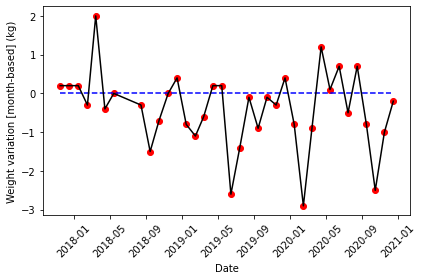

In [34]:
df_max=df[["Year","Month","Date"]].groupby(["Year","Month"]).max()
df_min=df[["Year","Month","Date"]].groupby(["Year","Month"]).min()
df_max=df_max.reset_index()
df_min=df_min.reset_index()
df_minmax=df_max.merge(df[["Date","Weight"]],how="left",on=["Date"],validate="1:1")
df_minmax=df_minmax.merge(df_min,how="left",on=["Year","Month"],validate="1:1")
df_minmax=df_minmax.merge(df[["Date","Weight"]],how="left",left_on=["Date_y"],right_on=["Date"],validate="1:1")
df_minmax.rename(columns={'Date_x': 'Date_max', 'Weight_x': 'Weight_max',
                            'Date_y': 'Date_min', 'Weight_y': 'Weight_min'}, inplace=True)
df_minmax["dw"]=df_minmax["Weight_max"]-df_minmax["Weight_min"]
df_minmax["Date_ref"] = pd.to_datetime(df_minmax["Year"].map('{:04}'.format) + "-" 
                                 + df_minmax["Month"].map('{:02}'.format) + "-15", format='%Y-%m-%d')
fig, ax = plt.subplots()
plt.plot(df_minmax["Date_ref"],df_minmax["dw"],color="black")
plt.scatter(df_minmax["Date_ref"],df_minmax["dw"],color="r")
plt.xticks(rotation=45)
plt.hlines(0., min(df_minmax["Date_min"]), max(df_minmax["Date_max"]), colors='b', linestyles='--')
plt.xlabel("Date")
plt.ylabel("Weight variation [month-based] (kg)")
plt.tight_layout()
plt.show()
pdf.savefig(fig)

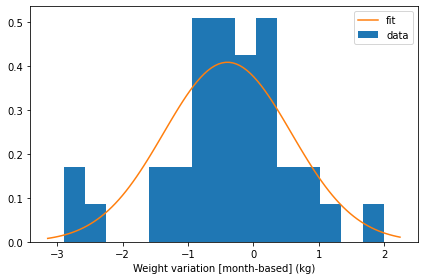

mean: -0.39, std: 0.98


In [35]:
fig, ax = plt.subplots()
plt.hist(df_minmax["dw"],bins=15,density=True,label="data")
mean,std=norm.fit(df_minmax["dw"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,label="fit")
plt.legend()
plt.xlabel("Weight variation [month-based] (kg)")
plt.tight_layout()
plt.show()
pdf.savefig(fig)
print(f"mean: {mean:.2f}, std: {std:.2f}")

In [36]:
pdf.close()